# 1. Reading the datasets


Authentication of the user to access the google drive

In [1]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Getting the content of the files 

In [2]:
Test_set_file = drive.CreateFile({'id':'1zhhuNTbRz8bxaZV5ptzg61s_KKHPsYen'})
Train_set_file = drive.CreateFile({'id':'18dp8EcINfrOSuWuHpyaJ9c1ALsTVEJn5'})
Submission_file = drive.CreateFile({'id': '15XKgEz4maeLswZocbIoxMQvU4Bb7ghFD'})
Test_set_file.GetContentFile("test.csv")
Train_set_file.GetContentFile("train.csv")
Submission_file.GetContentFile('gender_submission')

# 2. Importing the packages

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
# As we see in the class we use this line of the code in order to show the figures inline.
%matplotlib inline 
import missingno as msno
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# 3. Reading the train dateset

In [8]:
Train_df = pd.read_csv('train.csv')

In [9]:
Train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Columns

In [ ]:
Train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Type of the columns

# 4. Missing values

## 4.1 Checking the missing values 

In [ ]:
Train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Text(0.5, 1.0, 'Missingno Visualization')

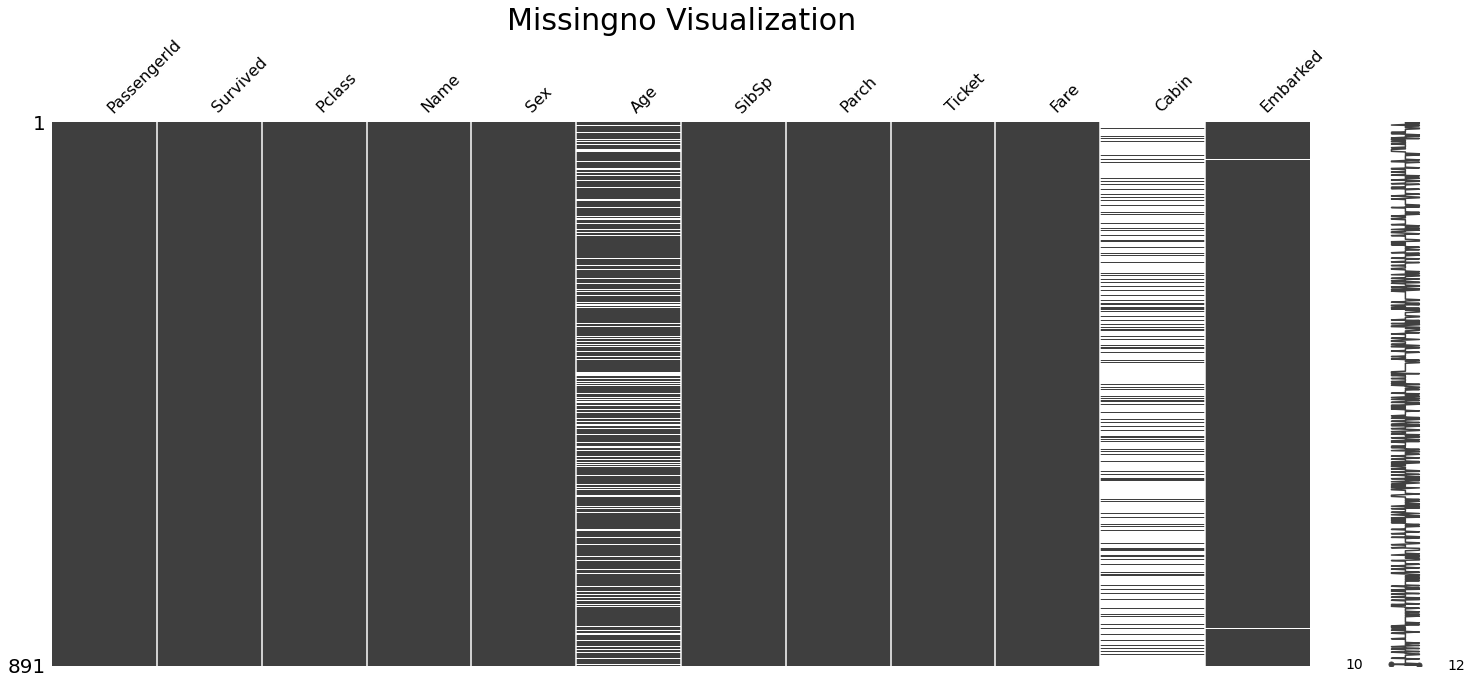

In [ ]:
msno.matrix(Train_df)
plt.title('Missingno Visualization', fontsize=30)

* **Note:** We have missing values in these columns: **'Age', 'Cabin', 'Embarked'**

Taking a closer look to these columns

Text(0.5, 1.0, 'Missingno Visualization')

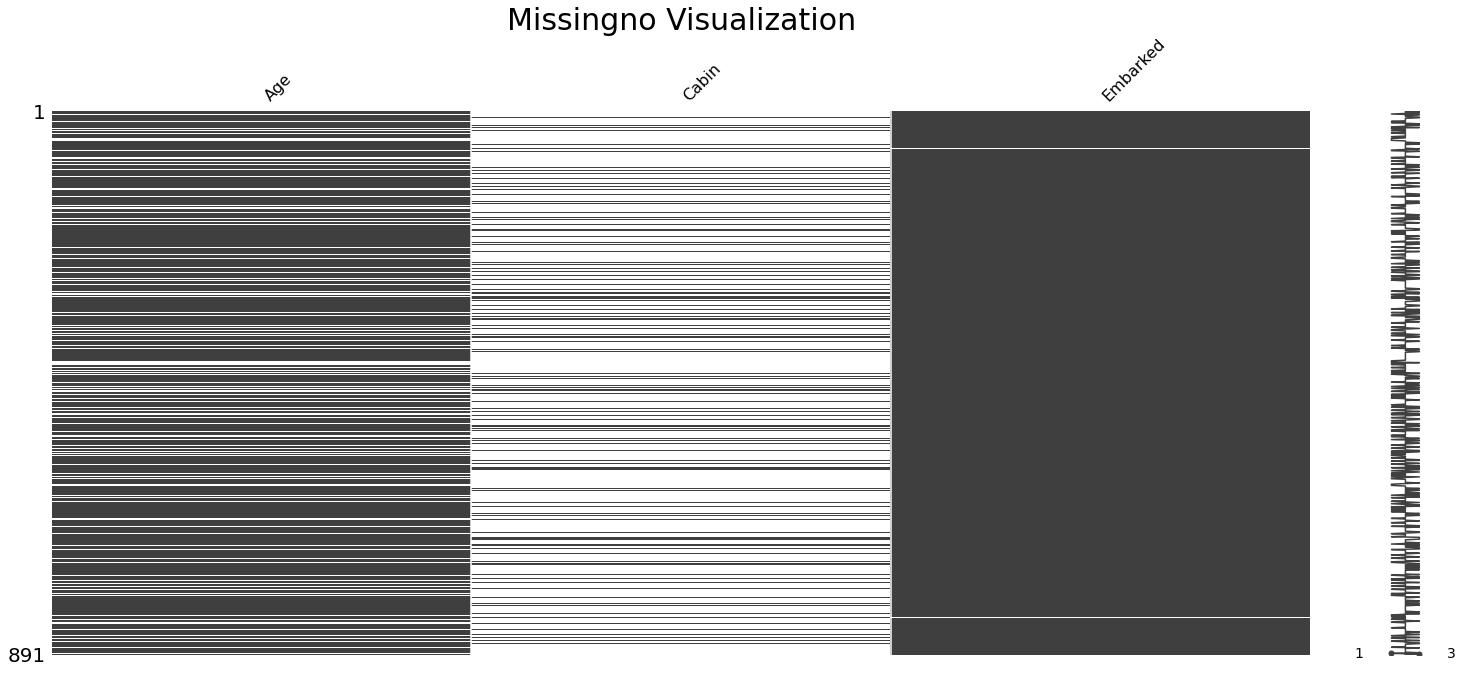

In [ ]:
msno.matrix(Train_df[['Age', 'Cabin', 'Embarked']])
plt.title('Missingno Visualization', fontsize=30)

Checking the percentage of the missing values

In [ ]:
round(Train_df[['Age', 'Cabin', 'Embarked']].isnull().sum()/Train_df.shape[0]*100, 2)

Age         19.87
Cabin       77.10
Embarked     0.22
dtype: float64

In [ ]:
Contained_miss_cols = ['Age', 'Cabin', 'Embarked']
for col in Contained_miss_cols: 
  print(f"In the column {col} {round(Train_df[col].isnull().sum()/Train_df.shape[0]*100, 2)}% are missed. ")

In the column Age 19.87% are missed. 
In the column Cabin 77.1% are missed. 
In the column Embarked 0.22% are missed. 


* **Note:** As we are having more than 50% missing values in the **'Cabin'** column, the best approach for this column is to drop the whole column. 

Dropping the **'Cabin'** column from the dataset

In [ ]:
Train_df.drop('Cabin', inplace = True, axis = 1)
Train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

## 4.2 Handling the missing values

### 4.2.1 Removing

In [ ]:
Removed_missed = Train_df.dropna()
Removed_missed.info()
print('-' * 30 )
print('Number of missing values in each column: ', end = '\n\n')
Removed_missed.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB
------------------------------
Number of missing values in each column: 



PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### 4.2.2 Imputing

Taking the columns that are containing at least one missed value.

In [ ]:
Column_missed = Train_df.columns[Train_df.isnull().any()]
Column_missed

Index(['Age', 'Embarked'], dtype='object')

#### 4.2.2.1 **Most frequent approach**

In [ ]:
Imputed_df_most_frequent = Train_df.copy()
imp = SimpleImputer(missing_values=np.nan, strategy= "most_frequent")
imputed_temp = imp.fit_transform(Train_df[Column_missed])
Imputed_df_most_frequent[Column_missed] = imputed_temp

In [ ]:
Imputed_df_most_frequent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    object 
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 76.7+ KB


* **Note:** When we use the **most_frequent** approach we will get a string like of the values. As this approach can be both use for numeric and string like values. 

We need to convert the values again from the string to float values in 'Age' column. 

In [ ]:
Imputed_df_most_frequent['Age'] = Imputed_df_most_frequent['Age'].astype(float)

In [ ]:
Imputed_df_most_frequent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Looking at the percentile of the values in each column.

In [ ]:
Imputed_df_most_frequent.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Chceking the missed values again 

In [ ]:
Imputed_df_most_frequent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


#### 4.2.2.2 **Mean approach**

In [ ]:
cat_col = [col for col in Train_df.columns if Train_df[col].dtype == 'object']
num_col = [col for col in Train_df.columns if Train_df[col].dtype != 'object']
display(cat_col)
display(num_col)

['Name', 'Sex', 'Ticket', 'Embarked']

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [ ]:
Imputed_df_mean = Train_df.copy()
imp = SimpleImputer(missing_values=np.nan, strategy="mean")
imputed_temp = imp.fit_transform(Train_df[['Age']])
Imputed_df_mean[['Age']] = imputed_temp

Looking at the percentile of the values in each column.

In [ ]:
Imputed_df_mean.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Checking the missed values again 

In [ ]:
Imputed_df_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


### 4.2.2.3 **Median approach**

In [ ]:
Imputed_df_median = Train_df.copy()
imp = SimpleImputer(missing_values=np.nan, strategy="median")
imputed_temp = imp.fit_transform(Train_df[['Age']])
Imputed_df_median[['Age']] = imputed_temp

Looking at the percentile of the values in each column.

In [ ]:
Imputed_df_median.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Checking the missed values again 

In [ ]:
Imputed_df_median.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


### 4.2.2.4 **KNN multivariate approach**


In [ ]:
Imputed_df_knn = Train_df.copy()
imp = KNNImputer(n_neighbors=5, missing_values=np.nan)
cols = ['Fare', 'Age', 'Parch', 'SibSp']
Imputed_temp = imp.fit_transform(Train_df[cols])
Imputed_df_knn[cols] = Imputed_temp

In [ ]:
Imputed_df_knn.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,30.094880,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.497779,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.500000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
Imputed_df_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    float64
 7   Parch        891 non-null    float64
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(4), int64(3), object(4)
memory usage: 76.7+ KB


* **Note:** We will consider the **most_frequent** approach for 'Embarked' column and **median** approach for 'Age' columns to fill the null values.

In [ ]:
Final_imputed_df = Imputed_df_knn.copy()
Final_imputed_df['Embarked'] = Imputed_df_most_frequent['Embarked']
Final_imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    float64
 7   Parch        891 non-null    float64
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(4), int64(3), object(4)
memory usage: 76.7+ KB


# 5. **Duplicate values**

In [ ]:
print("The number of duplicated values:", Final_imputed_df.duplicated().sum())

The number of duplicated values: 0


\*** **Note:** We can have different orders to handle missing values and outliers.
  1. Handling **missing values first** and **then handling the outliers**
  2. Handling the **outliers first** and **then missing values**

We can consider these two approaches as **when we use imputing to handle our missing values**, these new values **may affect the distribution of the features**. In this notebook we will **consider both approaches** and at the end **we will compare the results** to see in the specific dataset which one will be better. 


# 6. **Outliers**

In this section we will check the possible outliers that might be in the dataset. We will to this process by using several techniques. 

Outliers should be handled as some of the algorightms and techniques in Machine Learning are really sensitive to the existence of outliers in the dataset. 

* **Algorithms that are sensitive to outliers:**
  1. **Logistic Regression**
  2. **Support Vector Machine (SVM)**
  3. **Naive Bayes**
  4. **K-Nearest Neighbors (KNN)**
  5. **K-Means**

* **Algorithms that can accept outliers:**
  1. **Decision Tree**
  2. **Random Forest**
  3. **K-Medians**

## 6.1 **Boxplots**

In descriptive statistics, a box plot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram. **Outliers may be plotted as individual points before lower whisker or after upper whisker**

**IQR (interquartile range):** the range between 25th to the 75th percentile.  

‌Boxplots are indicating 5 important features about a distribution: 

1. **Lower_whisker**: Q1 -1.5 * IQR
2. **First Quartile (Q1)**:‌ the middle number between the smallest number (not the “minimum”) and the median of the dataset.
3. **Median (Second Quartile/Q2)**:‌ the middle value of the dataset.
4. **Third Quartile (Q3)**:‌the middle value between the median and the highest value (not the “maximum”) of the dataset.
5. **Upper_whisker**: Q3 + 1.5 * IQR

### 6.1.1 Outliers before missing values

Here we will use the function **plot** of the dataframe in order to show the boxplot related to the numerical columns of the dataframe. 

**Note:** In this section we will consider the **outliers before handling the missing values** for the features that are containing missing values. 

**Note:** When we are using the plot function of the dataframe, the function itself won't consider null values in order to make a visualization. 

Let's take a look at the boxblot for all of the numerical features in the dataframe. 

PassengerId       AxesSubplot(0.125,0.787927;0.352273x0.0920732)
Survived       AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
Pclass            AxesSubplot(0.125,0.677439;0.352273x0.0920732)
Age            AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
SibSp             AxesSubplot(0.125,0.566951;0.352273x0.0920732)
Parch          AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
Fare              AxesSubplot(0.125,0.456463;0.352273x0.0920732)
dtype: object

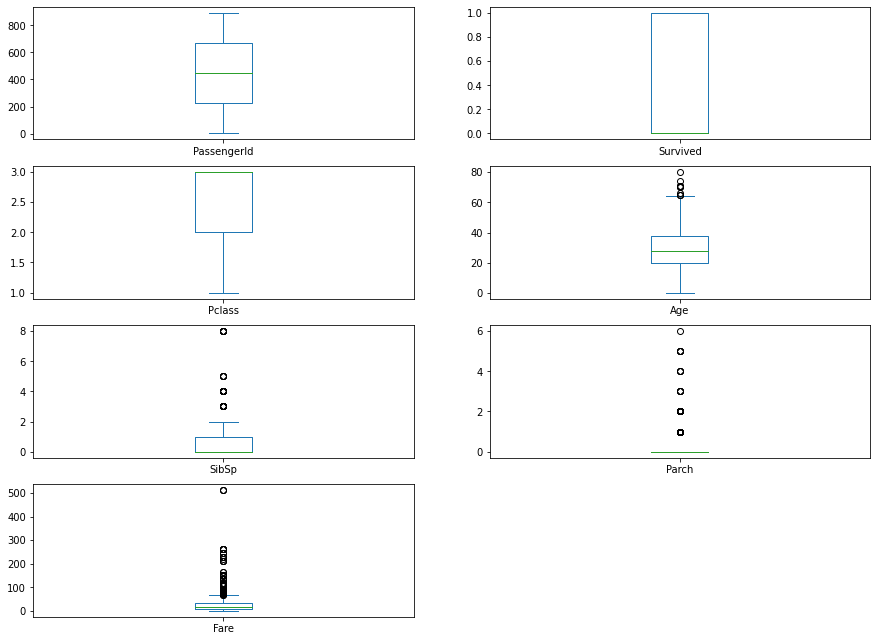

In [ ]:
Train_df.plot(kind="box",subplots=True,layout=(7,2), figsize=(15,20))

* **Note:** Whenever you can see some disjoint points from the distribution, they are considered as outliers. In this case we have 4 columns (**'Age'**, **'SibSp'**, **'Parch'** and **'Fare'**) that are containing outliers. 

* **Note:** In visualizaiton of boxplot, we should keep in mind that the **lower-whisker point** will be considered as **the smallest value in the distribution which is greater/equal to lower-whisker**, and the **upper-whisker point** will be considered as **the greatest value in the distribution which is smaller/equal to upper-whisker**. 

Let's take a closer look at **'Age'** feature. 

Text(0.5, 0, 'Age')

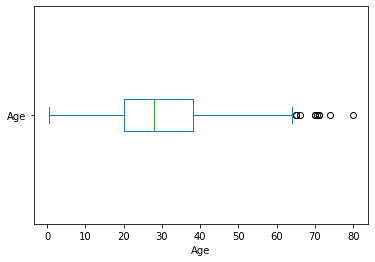

In [ ]:
Train_df['Age'].plot(kind = 'box', vert = False)
plt.xlabel('Age')

Boxplot of the **'Fare'** feature. 

Text(0.5, 0, 'Fare')

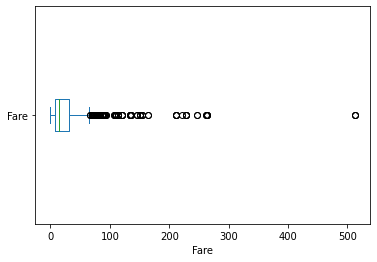

In [ ]:
Train_df['Fare'].plot(kind = 'box', vert=False)
plt.xlabel('Fare')

Boxplot of **'SibSp'** feature. 

Text(0.5, 0, 'SibSp')

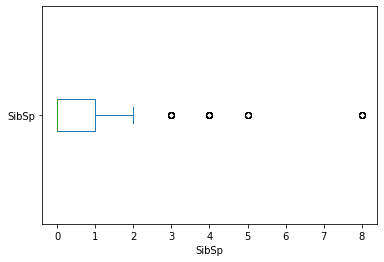

In [ ]:
Train_df['SibSp'].plot(kind = 'box', vert=False)
plt.xlabel('SibSp')

Boxplot of **'Parch'** feature. 

Text(0.5, 0, 'Parch')

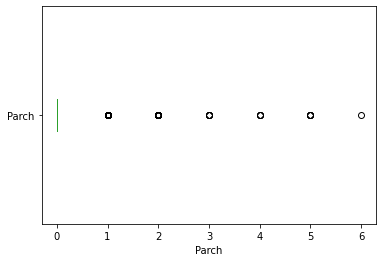

In [ ]:
Train_df['Parch'].plot(kind = 'box', vert=False)
plt.xlabel('Parch')

### 6.1.2 Outliers after missing values

In [ ]:
import seaborn as sns

* **Note:** In this section we are **checking the dataset after handling missing values**. The dataframe 'Final_imputed_df' are the dataframe that has picked **'most_frequent' and 'median' approaches** to handle **missing values in categorical features and numerical** features respectively. 

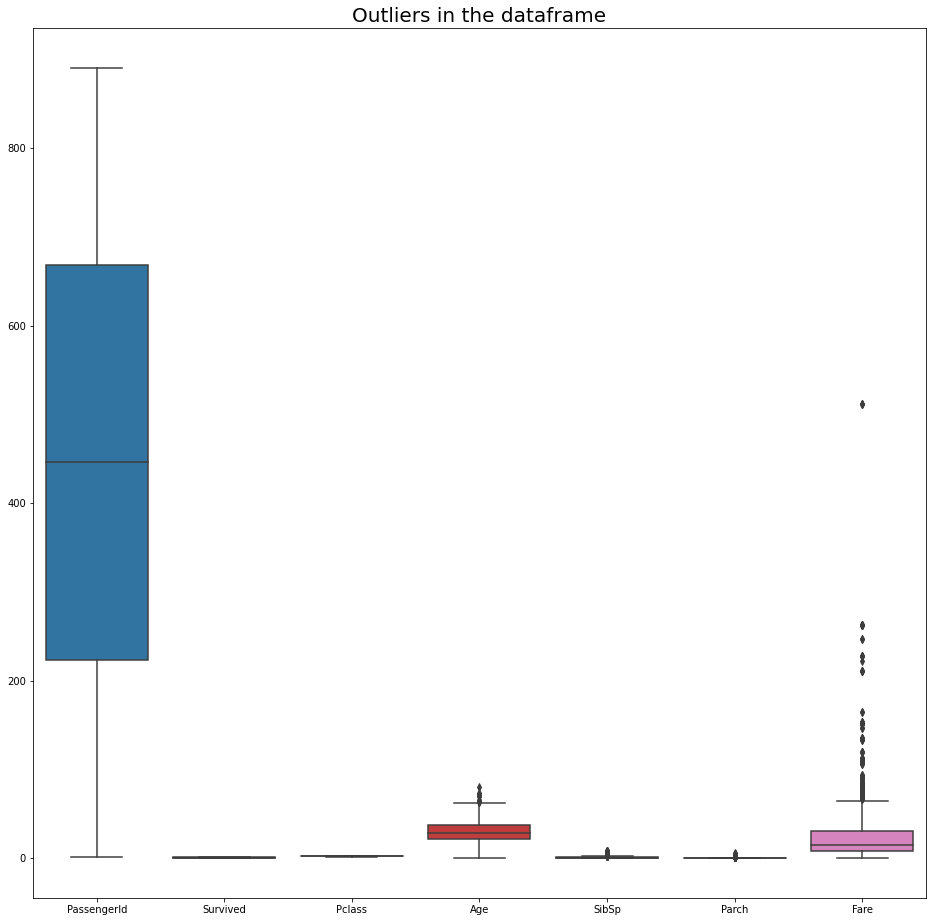

In [ ]:
plt.figure(figsize=(16,16), facecolor='w')
plt.title('Outliers in the dataframe', fontsize = 20)
sns.boxplot(data = Final_imputed_df)

As we can see in the picture above we have outliers in **'Age'**, **'SibSp'**, **'Parch'** and **'Fare'** columns. Let's take a closer look at these columns.

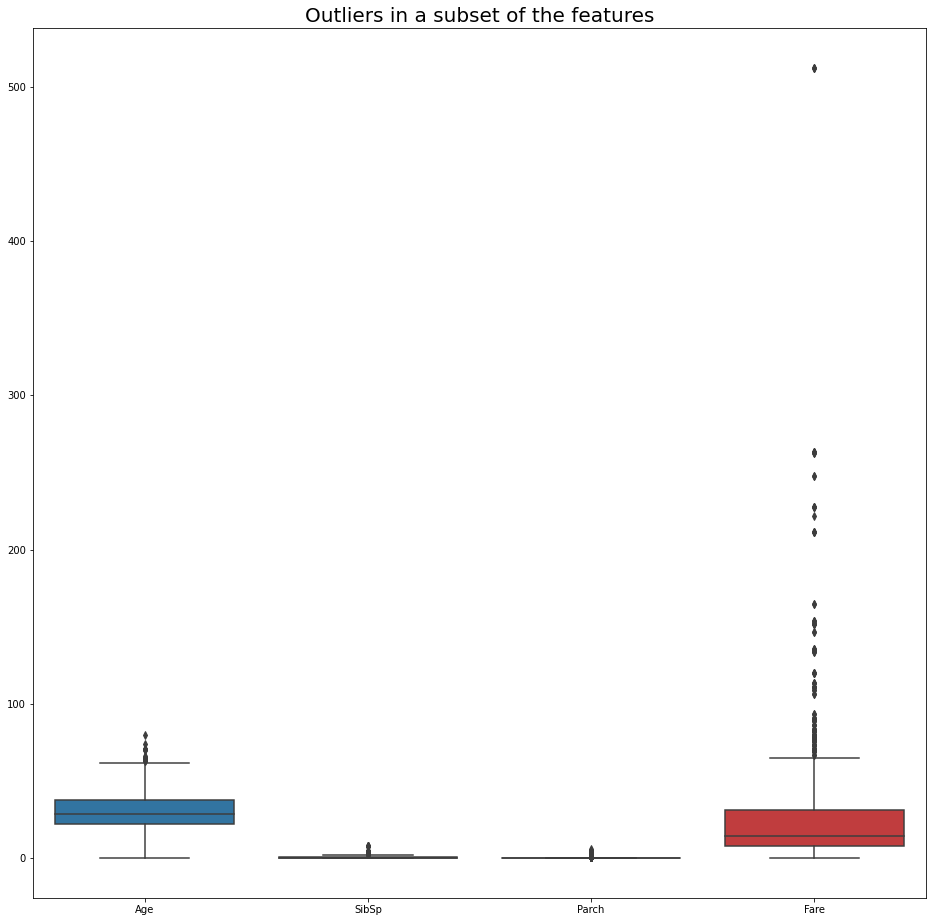

In [ ]:
plt.figure(figsize=(16,16), facecolor='w')
plt.title('Outliers in a subset of the features', fontsize = 20)
sns.boxplot(data = Final_imputed_df[['Age', 'SibSp', 'Parch', 'Fare']])

In [25]:
# This function will show the boxplot of the given columns in the given dataframe
def Check_outliers_boxplot(dataframe, columns):
  colors = plt.rcParams["axes.prop_cycle"]()
  fig, axes = plt.subplots(2, 2, figsize=(20, 10)) 
  axes = axes.flatten()
  for index, col in enumerate(columns):
    c = next(colors)["color"]
    sns.boxplot(ax = axes[index], data = dataframe[columns[index]], color = c)
    axes[index].set_title(columns[index], fontsize = 15)

# This function will return the upper and lower bound of the whisker for given column in the given dataframe
def outlier_bound(dataframe, column):

  q1= np.percentile(dataframe[column], 25)
  q3= np.percentile(dataframe[column], 75)
  iqr=q3-q1
  upper_whisker = q3 + 1.5*(iqr)
  lower_whisker = q1 - 1.5*(iqr)
 
  return [round(lower_whisker, 2), round(upper_whisker, 2)] 

# This function will print the upper bound and the lower bound of the whisker for the given columns
def outliers_info(data, columns):
  for col in columns: 
    lower_whisker, upper_whisker = outlier_bound(data, col)
    print(f"The column \'{col}\':")
    print(f"Lower-bound: \'{lower_whisker}\', Upper-bound: \'{upper_whisker}\'")
    outliers = data[(data[col]<lower_whisker) | (data[col]>upper_whisker)] 
    
    print(f'Number of outliers in \'{col}\' Column is : \'{len(outliers)}\'')
    print('-'*30)


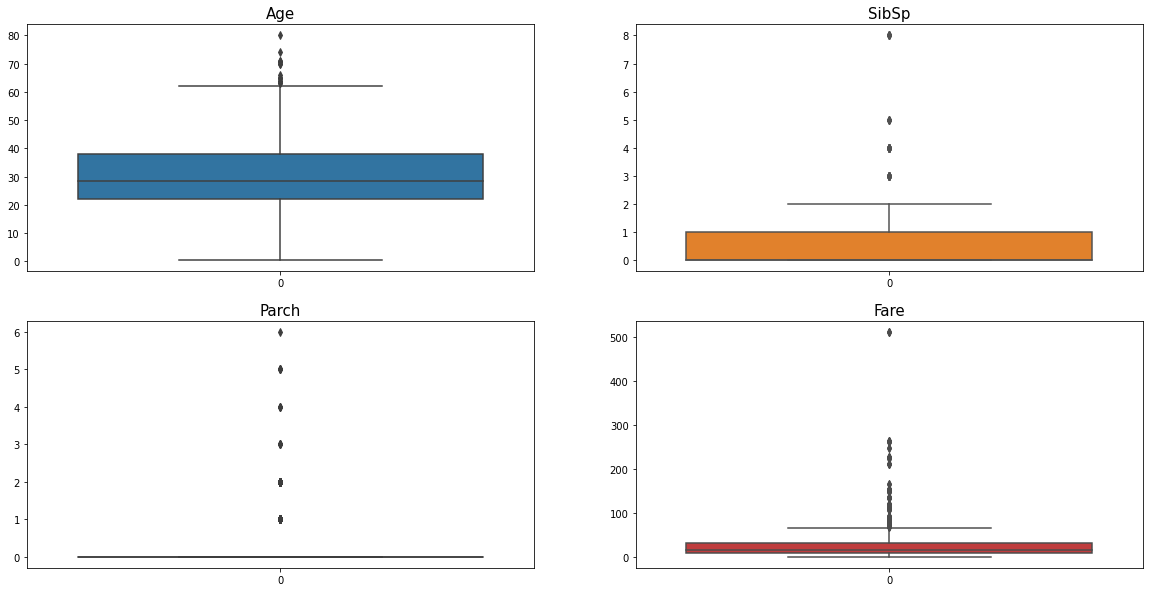

In [ ]:
Check_outliers_boxplot(Final_imputed_df, ['Age', 'SibSp' , 'Parch', 'Fare'])

In [ ]:
outliers_info(Final_imputed_df, ['Age', 'SibSp' , 'Parch', 'Fare'])

The column 'Age':
Lower-bound: '-2.0', Upper-bound: '62.0'
Number of outliers in 'Age' Column is : '15'
------------------------------
The column 'SibSp':
Lower-bound: '-1.5', Upper-bound: '2.5'
Number of outliers in 'SibSp' Column is : '46'
------------------------------
The column 'Parch':
Lower-bound: '0.0', Upper-bound: '0.0'
Number of outliers in 'Parch' Column is : '213'
------------------------------
The column 'Fare':
Lower-bound: '-26.72', Upper-bound: '65.63'
Number of outliers in 'Fare' Column is : '116'
------------------------------


## 6.2 **Scatterplots**

A scatter plot , is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.

* **Note:** In the scatterplots we can consider **outliers** as the datapoint that are far from the rest of the distribution. 

### 6.2.1 Ouliers before handling missing values

In this section we will plot scatterplots by considerin **'PassengerId'** and a feature among **['Age', 'SibSp', 'Parch', 'Fare']** once at a time. 

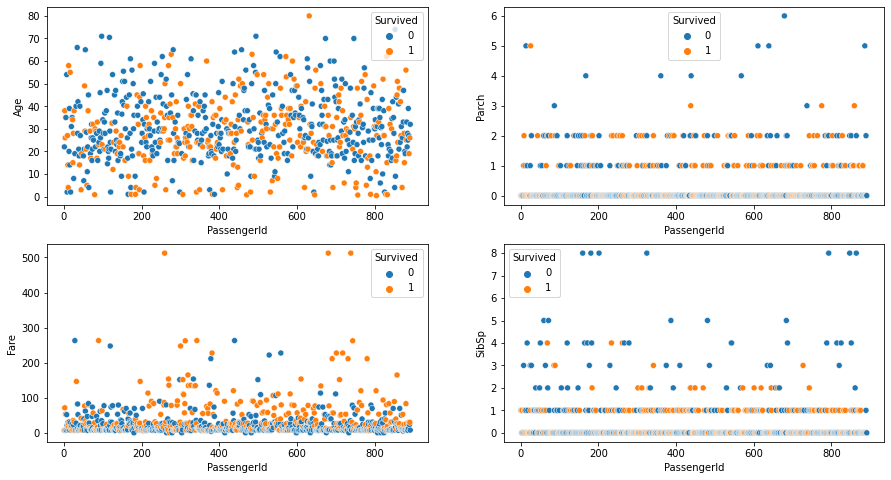

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (15, 8))
axes = axes.flatten()
for index, col in enumerate(['Age', 'Parch', 'Fare', 'SibSp']): 
  sns.scatterplot(ax = axes[index], data = Train_df, x = 'PassengerId', y = col, hue = 'Survived')

### 6.2.2 Outliers after handling missing values

Using **pairplot** we are able to see the scatterplots of all the combination of numerical features in the dataset. In the main diagonal you can see the distribution of each of the features independently. 

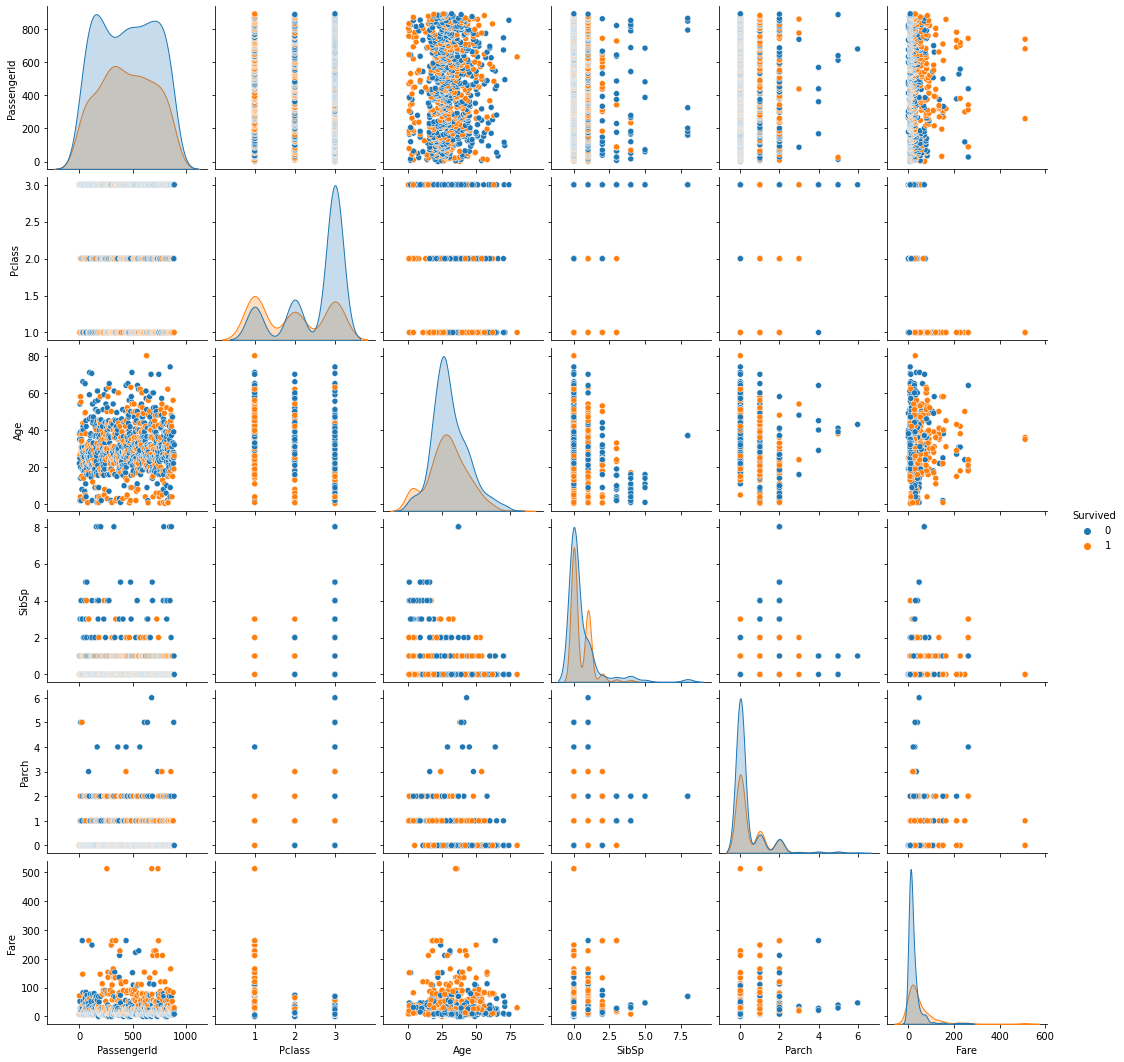

In [ ]:
sns.pairplot(Final_imputed_df, hue = 'Survived')

## 6.4 **Distribution plots**

We are able to identify outliers in each feature independently from the other features. We can easily take a look at the shape of the distribution and **consider the datapoints that are really far from the rest of datapoints as outliers**. 

### 6.4.1 Outliers before missing values

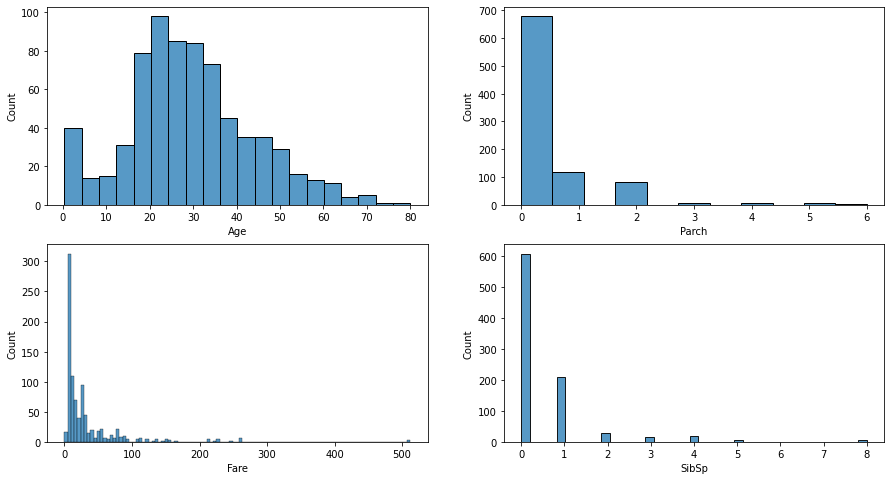

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (15, 8))
axes = axes.flatten()
for index, col in enumerate(['Age', 'Parch', 'Fare', 'SibSp']): 
  sns.histplot(Train_df[col], ax = axes[index])

### 6.4.2 Outliers after missing values

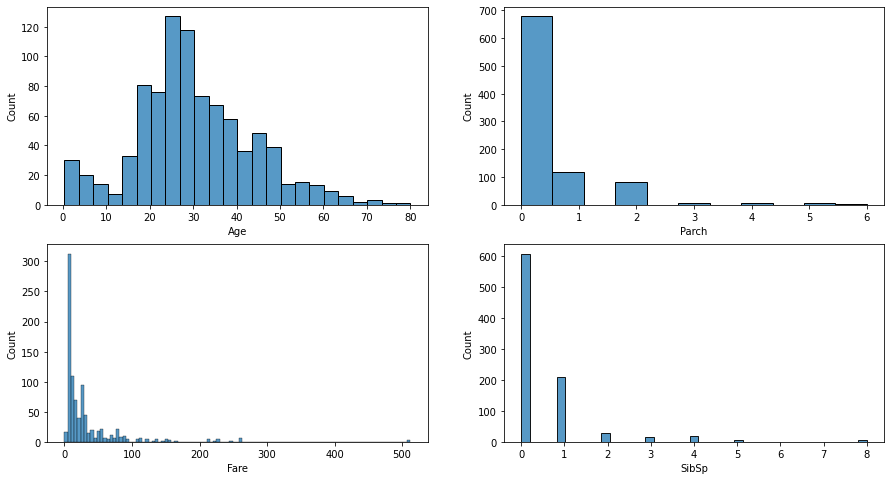

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (15, 8))
axes = axes.flatten()
for index, col in enumerate(['Age', 'Parch', 'Fare', 'SibSp']): 
  sns.histplot(Final_imputed_df[col], ax = axes[index])

## 6.3 **Z-Score**

The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.


* **Note:** When using this approach we are considering the distribution as a **normal distribution**. This method is really suitable for the features that are having a normal distribution. 

In [ ]:
from scipy import stats
import numpy as np
num_col = [col for col in Train_df.columns if Train_df[col].dtype != 'object']
z = np.abs(stats.zscore(Final_imputed_df[num_col]))
threshold = 3
print("The records and their corresponding column that has outlier in: \n", np.where(z > threshold))

The records and their corresponding column that has outlier in: 
 (array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 118, 119,
       159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278, 299,
       311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493, 527,
       541, 542, 557, 567, 610, 630, 638, 678, 679, 683, 686, 689, 700,
       716, 730, 736, 737, 742, 774, 779, 787, 792, 813, 824, 846, 850,
       851, 858, 863, 885]), array([5, 4, 5, 6, 4, 4, 4, 4, 5, 6, 3, 6, 4, 4, 4, 5, 4, 4, 4, 4, 4, 6,
       4, 4, 4, 6, 6, 4, 6, 5, 6, 6, 4, 5, 5, 6, 4, 3, 6, 4, 4, 6, 5, 5,
       3, 5, 5, 6, 4, 4, 6, 6, 6, 6, 5, 6, 6, 5, 6, 4, 4, 4, 4, 4, 4, 3,
       5, 4, 5]))


## 6.4 **IQR score**

The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.
In other words, the IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data.
It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers.

* **Note:** This method is the same as boxplot technique. Then only difference is that in the Boxplot we have a visualization of the distribution while in the IQR we don't visualize the data and we just working on identifying the outliers. 

# 7. Feature Selection

In this section we are trying to find a subset of the features that gives us more valuable information and reduce the irrelevant and redundant features. Reducing the number of the features will lead us to have less computational time and also avoiding overfitting. 

## 7.1 Features distribution

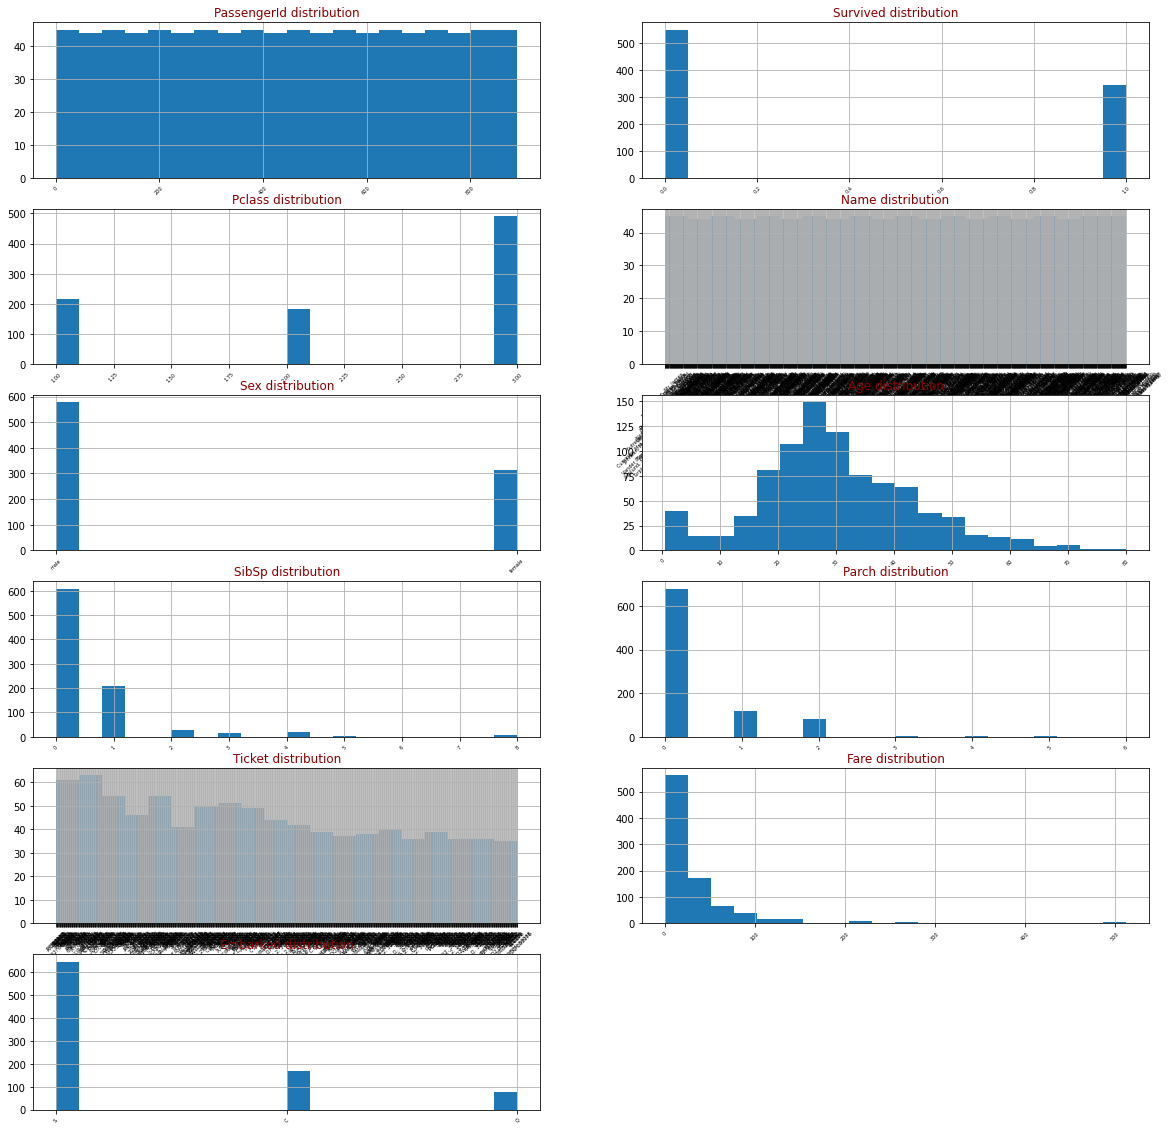

In [ ]:
fig=plt.figure(figsize=(20,20))
for index, column in enumerate(Final_imputed_df.columns):
    ax=fig.add_subplot(6,2,index+1)
    Final_imputed_df[column].hist(bins=20,ax=ax)
    plt.xticks(rotation = 45, fontsize = 5)
    ax.set_title(column + " distribution",color='darkred')

* **Note:** Looking at the distribution of the features we can understand that the features 'PassengerId', 'Name' and 'Ticket' are irrelevant with respect to the our application as there are lots of different values for each of these features and these values won't contribute to have a distinction between two classes. So **we decide to remove these 3 columns from the dataset**

In the first place we will remove the 3 mentioned features from the dataframe. 

In [ ]:
Cleaned_Final_imputed_df = Final_imputed_df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1).copy()

#### **(Test) Converting 'Age' from numerical to categorical feature**

* **Note:'** If we want to turn the 'Age' feature from a numerical feature to a categorical feature we can use the following codes. 

In [ ]:

def Age_to_categorical(Numerical_age):
  if Numerical_age < 14: 
    return 'Child'
  if Numerical_age < 24: 
    return 'Youth'
  if Numerical_age < 64: 
    return 'Adult'
  else:
    return 'Senior'

In [ ]:
# Cleaned_Final_imputed_df['Age'] = Cleaned_Final_imputed_df['Age'].apply(Age_to_categorical)

Checking the distribution of the features again after removing the 3 mentioned columns. 

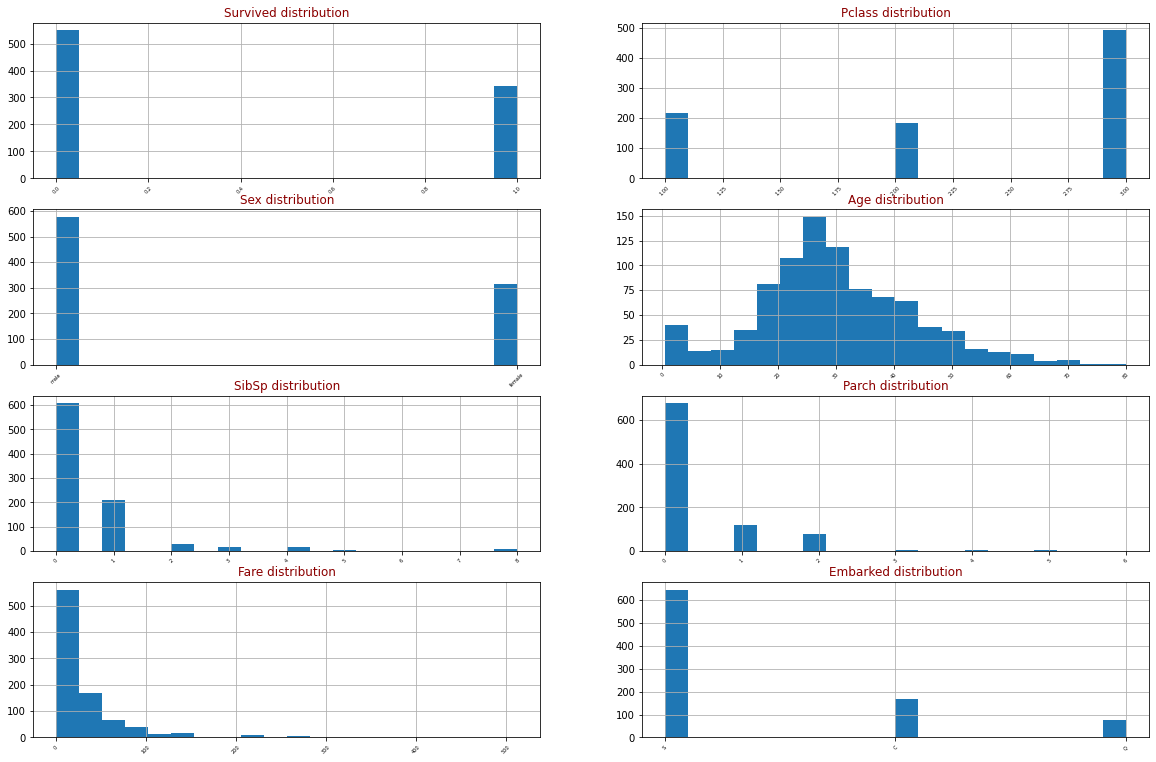

In [ ]:
fig=plt.figure(figsize=(20,20))

for index, column in enumerate(Cleaned_Final_imputed_df.columns):
    ax=fig.add_subplot(6,2,index+1)
    Cleaned_Final_imputed_df[column].hist(bins=20,ax=ax)
    plt.xticks(rotation = 45, fontsize = 5)
    ax.set_title(column + " distribution",color='darkred')

## 7.2. Checking the correlation

To check the correlations between the features and the target variable, for the **numerical features** we will use the correlation between those and to check **categorical features** we will use the countplot of the possible values of the features w.r.t the target variable. 

### 7.2.1 Checking the correlation between features and target variable

In [ ]:
import seaborn as sn

Pearson metric = Covariance(x, y) / std(x) * std(y)  

Survived    1.000000
Pclass      0.338481
Fare        0.257307
Parch       0.081629
Age         0.058335
SibSp       0.035322
Name: Survived, dtype: float64

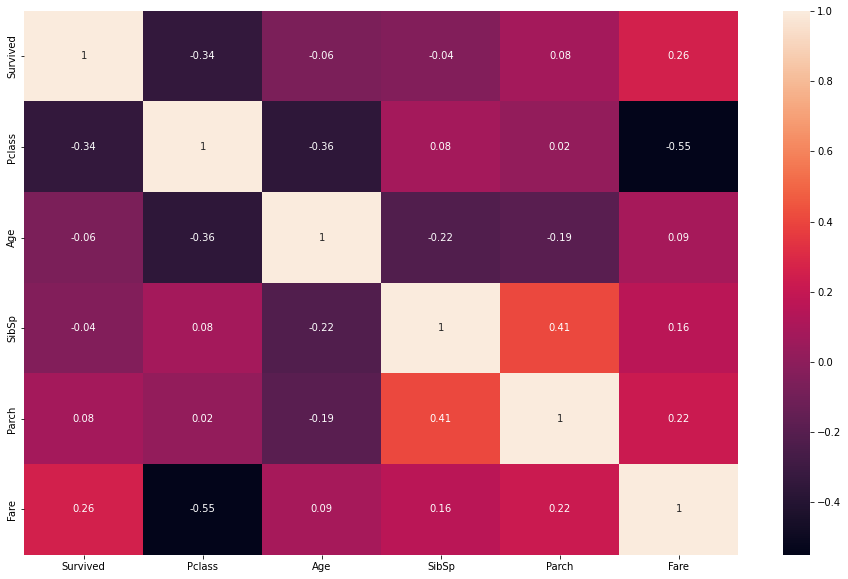

In [ ]:
def Correlation(dataframe,target_variable):
  fig, ax = plt.subplots(figsize=(16,10))
  correlation_matrix = dataframe.corr().round(2)
  sn.heatmap(data=correlation_matrix, annot=True)
  correlation = dataframe.corr()[target_variable].abs().sort_values(ascending = False)
  return correlation
    
Correlation(Cleaned_Final_imputed_df,"Survived")

We can interpret these numbers in this way:

1. **Strong correlation:** If the correlation degree lies between ± 0.50 and ± 1
2. **Medium correlation:** If the correlation degree lies between ± 0.30 and ± 0.49
3. **Small correlation:** If the correlation degree lies between ± 0.29 and 0

## 7.2.2 Checking the categorical features distribution w.r.t target variable

In [ ]:
Categorical_features = [col for col in Cleaned_Final_imputed_df.columns if Cleaned_Final_imputed_df[col].dtype == 'object']
Categorical_features

['Sex', 'Embarked']

In [ ]:
def countplot_with_target(df, columns, n_cols= 2):
  fig, axes = plt.subplots(1, n_cols, figsize=(17,9))
  for index,column in enumerate(columns):     
      ax = sn.countplot(
          x='Survived',
          hue=column ,
          ax=axes[index],
          data=df,
          palette = 'Set1'
          )
      ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
      for p in ax.patches:
        percentage = (p.get_height()/len(df)*100).round(1)
        txt = str(percentage)+'%'
        txt_x = p.get_x() 
        txt_y = p.get_height() + 30
        ax.text(txt_x,txt_y,txt)
  fig.tight_layout(pad=1.5)

**'Sex' and 'Embarked' w.r.t to 'Survived'**

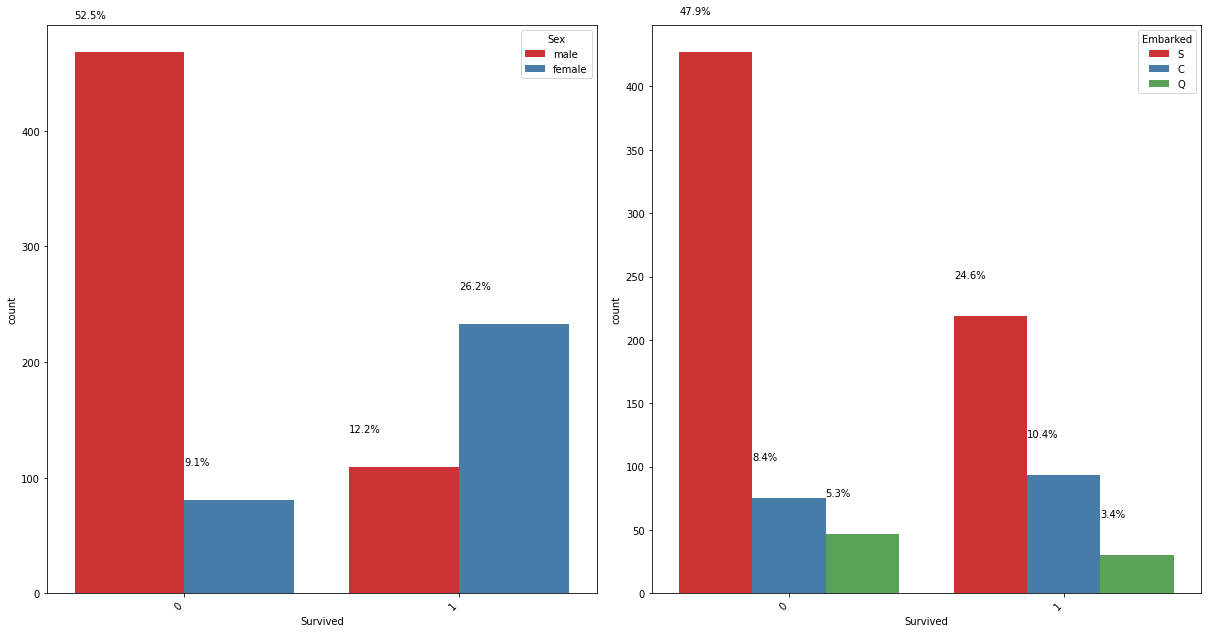

In [ ]:
countplot_with_target(Cleaned_Final_imputed_df, Categorical_features)

* We wrote a function that given the dataframe and the target variable of the given dataframe will split the dataframe into two dataframes. One for the features of the data and the other one for the target variable. 

In [6]:
def Split_dataframe(dataframe, target_col): 
  X = dataframe.copy().drop(target_col, axis = 1)
  y = dataframe[target_col]
  return X, y

# 8. Feature selection (more techniques)

Basically techniques in **Feature Selection** can be categorized into 4 different categories: 
  1. **Filter Methods**
  2. **Wrapper Methods** 
  3. **Embedded Methods**
  4. **Hybrid Methods**


Here we will go through some of the most popular methods in each of these techniques. 

## 8.1 **Filter Methods**

Filter methods **pick up the intrinsic properties of the features measured via univariate statistics instead of cross-validation performance**. These methods are **faster** and **less computationally expensive** than wrapper methods. When dealing with high-dimensional data, it is computationally cheaper to use filter methods.

Here we will separate the X features and the y target variable to have a better understanding of the dataset. 

In [ ]:
X_train  = Final_imputed_df.copy().drop('Survived', axis = 1)
y_train = Final_imputed_df['Survived'].copy()

In [ ]:
Numerical_columns = [col for col in X_train.columns if X_train[col].dtype != 'object']
Categorical_columns = [col for col in X_train.columns if X_train[col].dtype == 'object']

### 8.1.1 Information Gain
Information gain calculates the reduction in entropy from the transformation of a dataset. It can be used for feature selection by evaluating the Information gain of each variable in the context of the target variable.

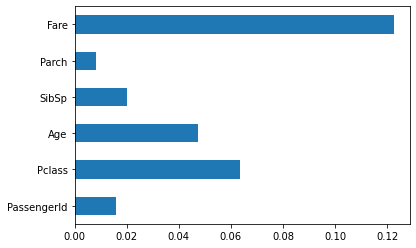

In [ ]:
from sklearn.feature_selection import mutual_info_classif
importances = pd.Series(mutual_info_classif(X_train[Numerical_columns], y_train), Numerical_columns)
importances.plot(kind = 'barh')

### 8.1.2 Variance Threshold

The variance threshold is a simple baseline approach to feature selection. It **removes all features which variance doesn’t meet some threshold**. By default, it removes all zero-variance features, i.e., features that have the same value in all samples. We assume that **features with a higher variance may contain more useful information, but note that we are not taking the relationship between feature variables or feature and target variables into account**, which is one of the drawbacks of filter methods.

In [ ]:
from sklearn.feature_selection import VarianceThreshold

v_threshold = VarianceThreshold(threshold = 0)
v_threshold.fit(X_train[Numerical_columns])
pd.Series(v_threshold.get_support(), Numerical_columns)

PassengerId    True
Pclass         True
Age            True
SibSp          True
Parch          True
Fare           True
dtype: bool

### 8.1.3 Mean Absolute Difference (MAD)
‘The mean absolute difference (MAD) computes the absolute difference from the mean value. The main difference between the variance and MAD measures is the absence of the square in the latter. The MAD, like the variance, is also a scale variant.’ [1] This means that higher the MAD, higher the discriminatory power.

In [ ]:
import numpy as np

PassengerId    222.749719
Pclass           0.761968
Age             10.381328
SibSp            0.713780
Parch            0.580742
Fare            28.163692
dtype: float64

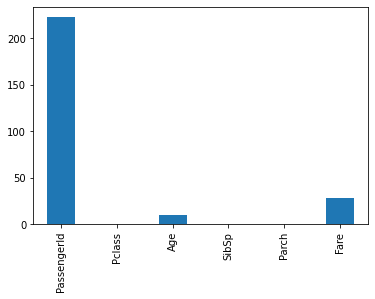

In [ ]:
Mean_abs_diff = np.sum(np.abs(X_train[Numerical_columns] - np.mean(X_train[Numerical_columns], axis = 0 )), axis = 0 )/X_train.shape[0]
Mean_abs_diff.plot(kind = 'bar')
Mean_abs_diff

### 8.1.4 Dispersion Ratio
Another measure of dispersion applies the arithmetic mean (AM) and the geometric mean (GM)

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:52: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)


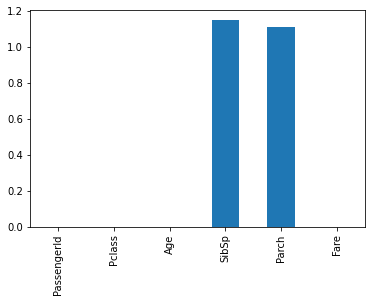

In [ ]:
X_train_copy = X_train[Numerical_columns].copy()
X_train_copy += 1
am = np.mean(X_train_copy, axis = 0)
gm = np.power(np.prod(X_train_copy, axis = 0), 1/X_train_copy.shape[0])
dispersion_ratio = am/gm
dispersion_ratio.plot(kind = 'bar')


## 8.2 **Wrapper Method**
Wrappers require some method to **search the space of all possible subsets of features, assessing their quality by learning and evaluating a classifier with that feature subset.** The feature selection process is based on a specific machine learning algorithm that we are trying to fit on a given dataset. **It follows a greedy search approach by evaluating all the possible combinations of features against the evaluation criterion.** The wrapper methods usually **result in better predictive accuracy than filter methods.**

### 8.2.1 Forward Feature Selection

This is an iterative method wherein we start with the best performing variable against the target. Next, **we select another variable that gives the best performance in combination with the first selected variable**. This process continues until the preset criterion is achieved.

In [ ]:
X_train_copy = X_train[Numerical_columns].copy()

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
ffs = SequentialFeatureSelector(lr)

ffs.fit(X_train_copy, y_train)
print(list(zip(list(ffs.get_support()), Numerical_columns)))

[(False, 'PassengerId'), (True, 'Pclass'), (True, 'Age'), (False, 'SibSp'), (True, 'Parch'), (False, 'Fare')]


### 8.2.2 __Exhaustive Feature Selector__

This is the most robust feature selection method covered so far. This is a brute-force evaluation of each feature subset. This means that it tries every possible combination of the variables and returns the best performing subset.

In [ ]:
len(Numerical_columns)

6

In [ ]:
X_train_copy

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1.0,0.0,7.2500
1,2,1,38.0,1.0,0.0,71.2833
2,3,3,26.0,0.0,0.0,7.9250
3,4,1,35.0,1.0,0.0,53.1000
4,5,3,35.0,0.0,0.0,8.0500
...,...,...,...,...,...,...
886,887,2,27.0,0.0,0.0,13.0000
887,888,1,19.0,0.0,0.0,30.0000
888,889,3,26.8,1.0,2.0,23.4500
889,890,1,26.0,0.0,0.0,30.0000


In [ ]:
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
lr = LogisticRegression(solver = 'liblinear')
efs1 = EFS(lr, min_features = 1, max_features = 6, scoring = 'accuracy', cv = 10)
efs1 = efs1.fit(X_train_copy, y_train)
print('\nBest accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

Features: 63/63


Best accuracy score: 0.71
Best subset (indices): (1, 2, 4)
Best subset (corresponding names): ('Pclass', 'Age', 'Parch')


### 8.2.3 Recursive Feature Elimination
Given **an external estimator that assigns weights to features** (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to **select features by recursively considering smaller and smaller sets of features**. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute.

Then, **the least important features are pruned from the current set of features**. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [ ]:
from sklearn.feature_selection import RFE
lr = LogisticRegression()
rfe = RFE(lr)
rfe = rfe.fit(X_train_copy, y_train)
print(list(zip(list(rfe.get_support()), Numerical_columns)))
rfe.score(X_train_copy, y_train)

[(False, 'PassengerId'), (True, 'Pclass'), (False, 'Age'), (True, 'SibSp'), (True, 'Parch'), (False, 'Fare')]


0.6868686868686869

### 8.3 **Embedded Method**
These methods **encompass the benefits of both the wrapper and filter methods**, by **including interactions of features** but **also maintaining reasonable computational cost**. Embedded methods are iterative in the sense that takes care of each iteration of the model training process and carefully extracts those features which contribute the most to the training for a particular iteration.

### 8.3.1 LASSO Regularization

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

selector = SelectFromModel(estimator=LogisticRegression(C = 10, solver = 'liblinear', penalty = 'l1')).fit(X_train_copy, y_train)
display(selector.estimator_.coef_)
display(selector.threshold_)
display(selector.get_support())

array([[-1.52139031e-04, -9.65090170e-01, -3.72866550e-02,
        -2.38802108e-01,  2.11047053e-01,  4.29670775e-03]])

1e-05

array([ True,  True,  True,  True,  True,  True])

After trying different techniques in order to find out what are the best features to be picked for training model, we decided to take the **suggestion of 'Exhaustive Feature Selector'**. 

This means that from the **numerical features** we will only consider the **'Pclass', 'Age' and 'Parch'**. 

In [ ]:
Categorical_columns

['Name', 'Sex', 'Ticket', 'Embarked']

In [ ]:
Cleaned_Final_imputed_df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp       float64
Parch       float64
Fare        float64
Embarked     object
dtype: object

In [ ]:
Selected_features_df = Cleaned_Final_imputed_df[['Pclass', 'Age', 'Parch','Sex', 'Embarked', 'Survived']]
Selected_features_df

,Pclass,Age,Parch,Sex,Embarked,Survived
0,3,22.0,0.0,male,S,0
1,1,38.0,0.0,female,C,1
2,3,26.0,0.0,female,S,1
3,1,35.0,0.0,female,S,1
4,3,35.0,0.0,male,S,0
...,...,...,...,...,...,...
886,2,27.0,0.0,male,S,0
887,1,19.0,0.0,female,S,1
888,3,26.8,2.0,female,S,0
889,1,26.0,0.0,male,C,1


# **9. Feature Engineering** 

Feature engineering is a machine learning technique that leverages data to create new variables that aren’t in the training set. It can produce new features for both supervised and unsupervised learning, with the goal of simplifying and speeding up data transformations while also enhancing model accuracy.

## 9.1 One-Hot-Encoding
This method spreads the values in a column to multiple flag columns and assigns 0 or 1 to them. These binary values express the relationship between grouped and encoded column.<br/>
This method changes your categorical data, which is challenging to understand for algorithms, to a numerical format and enables you to group your categorical data without losing any information.

In [ ]:
def My_one_hot_encoding_function(dataFrame, cat_cols):
  Result = dataFrame.copy()
  Temp_df = pd.get_dummies(dataFrame[cat_cols])
  Result = Result.join(Temp_df).drop(cat_cols, axis = 1)
  return Result

In [ ]:
Encoded_df = My_one_hot_encoding_function(Selected_features_df, ['Embarked', 'Sex'])
Encoded_df.head()

,Pclass,Age,Parch,Survived,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,3,22.0,0.0,0,0,0,1,0,1
1,1,38.0,0.0,1,1,0,0,1,0
2,3,26.0,0.0,1,0,0,1,1,0
3,1,35.0,0.0,1,0,0,1,1,0
4,3,35.0,0.0,0,0,0,1,0,1


In [ ]:
X_train, y_train  = Split_dataframe(Encoded_df, 'Survived')

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
lr = LogisticRegression(solver = 'liblinear')
efs1 = EFS(lr, min_features = 1, max_features = 8, scoring = 'accuracy', cv = 10)
efs1 = efs1.fit(X_train, y_train)
print('\nBest accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

Features: 255/255


Best accuracy score: 0.80
Best subset (indices): (0, 1, 2, 3, 4, 6)
Best subset (corresponding names): ('Pclass', 'Age', 'Parch', 'Embarked_C', 'Embarked_Q', 'Sex_female')


In [ ]:
Article = Train_df['Name'].apply(lambda x: (x.split(',')[1]).split('.')[0])
Article.value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Major             2
 Col               2
 the Countess      1
 Capt              1
 Ms                1
 Sir               1
 Lady              1
 Mme               1
 Don               1
 Jonkheer          1
Name: Name, dtype: int64

In [ ]:
New_Encoded_df = Encoded_df.join(Article)
New_Encoded_df = My_one_hot_encoding_function(New_Encoded_df, ['Name'])
New_Encoded_df

,Pclass,Age,Parch,Survived,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Name_ Capt,...,Name_ Master,Name_ Miss,Name_ Mlle,Name_ Mme,Name_ Mr,Name_ Mrs,Name_ Ms,Name_ Rev,Name_ Sir,Name_ the Countess
0,3,22.0,0.0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1,38.0,0.0,1,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3,26.0,0.0,1,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,35.0,0.0,1,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,3,35.0,0.0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0.0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
887,1,19.0,0.0,1,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
888,3,26.8,2.0,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
889,1,26.0,0.0,1,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
X_train, y_train = Split_dataframe(New_Encoded_df, 'Survived')

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
lr = LogisticRegression(solver = 'liblinear')
efs1 = EFS(lr, min_features = 1, max_features = 8, scoring = 'accuracy', cv = 10)
efs1 = efs1.fit(X_train, y_train)
print('\nBest accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

KeyboardInterrupt: ignored

## 9.2 Scaling 

In most cases, the numerical features of the dataset do not have a certain range and they differ from each other. In real life, it is nonsense to expect age and income columns to have the same range. But from the machine learning point of view, how these two columns can be compared?
Scaling solves this problem. The continuous features become identical in terms of the range, after a scaling process.

**Notes:** The algorithms that are working **based on distances** and also the ones that are **using gradient descent as the optimization technique**, will work better if they are passing scaled dataset. 

In order to scale the data we have two approaches: 
1. __Normalization__
2. __Standardization__ 

- Normalization is good to use **when you know that the distribution of your data does not follow a Gaussian distribution**. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.<br><br>
- Standardization, on the other hand, can be helpful in cases __where the data follows a Gaussian distribution__. However, this does not have to be necessarily true. Also, unlike normalization, __standardization does not have a bounding range__. So, even if you have outliers in your data, they will not be affected by standardization.

### 9.2.1 Normalization
Normalization (or min-max normalization) **scale all values in a fixed range** between 0 and 1. **This transformation does not change the distribution of the feature** and due to the decreased standard deviations, the effects of the outliers increases. Therefore, before normalization, it is recommended to handle the outliers.

* __Note:__ Normalization is absolutely a great thing to happen in data science, but it also create some problems as well because:  
Normalization compresses data within a certain range, reduces the variance and applies equal weights to all features. You lose a lot of important information in the process.

__Note:__ Before doing anything we will split the dataframe into X_train and y_train portions. 

In [ ]:
X_train, y_train = Split_dataframe(Encoded_df, 'Survived')

#### 9.2.1.1 MaxAbsScaler()
This estimator scales and translates each feature individually such that the maximal absolute value of each feature in the training set will be 1.0. It does not shift/center the data, and thus does not destroy any sparsity.

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
transformer = MaxAbsScaler().fit(X_train)
Max_abs_scaled_df = pd.DataFrame(transformer.transform(X_train), columns = X_train.columns)
Max_abs_scaled_df.head()

#### 9.2.1.2 MinMaxScaler
This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(X_train)
Min_max_scaled_df = pd.DataFrame(transformer.transform(X_train), columns = X_train.columns)
Min_max_scaled_df.head()

#### 9.2.2 Standardization
Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

In [ ]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(X_train)
Standard_scaled_df = pd.DataFrame(transformer.transform(X_train), columns = X_train.columns)
Standard_scaled_df.head()

#### 9.2.3 RobustScaler
This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).


In [ ]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X_train)
Robust_scaled_df = pd.DataFrame(transformer.transform(X_train), columns = X_train.columns)
Robust_scaled_df.head()

In [ ]:
Robust_scaled_df['Pclass'].value_counts()

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = 'liblinear')
Res = lr.fit(Max_abs_scaled_df, y_train)
Res.score(Max_abs_scaled_df, y_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = 'liblinear')
Res = lr.fit(Min_max_scaled_df, y_train)
Res.score(Max_abs_scaled_df, y_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = 'liblinear')
Res = lr.fit(Standard_scaled_df, y_train)
Res.score(Standard_scaled_df, y_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = 'liblinear')
Res = lr.fit(Robust_scaled_df, y_train)
Res.score(Robust_scaled_df, y_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = 'liblinear')
Res = lr.fit(X_train, y_train)
Res.score(X_train, y_train)

In [ ]:
from sklearn.model_selection import cross_val_score
lr = LogisticRegression(solver = 'liblinear', random_state = 50)
scores = cross_val_score(lr, X_train, y_train, cv=5)
scores

# Model Training

Here we will read our datasets from our Google Drive. 

In [10]:
Train_df = pd.read_csv('train.csv')
Test_df = pd.read_csv('test.csv')

Then we will the subset of the columns that we choose to build our model based on in the Feature Selection section. 

In [15]:
All_final_features = ['Pclass', 'Age', 'Parch','Sex', 'Embarked']
All_final_cat_cols = ['Sex', 'Embarked']

Then we will split the initial training set to X_train and y_train parts. 

In [16]:
X_train, y_train = Split_dataframe(Train_df[All_final_features + ['Survived']], 'Survived')

Here we implemented a function that will fill the missing values for us by the strategies that we have picked before. 
* __Most_frequent__ strategy for categorical features
* __Median strategy__ for numerical features

In [19]:
def Fill_missed_values(df):
   
  # We separate the numerical and the categorical features of our dataset
  num_cols = [col for col in df.columns if df[col].dtype != 'object']
  cat_cols = [col for col in df.columns if df[col].dtype == 'object']
  
  # As we are passing the one-hot encoded version of the 
  try:
    imp = SimpleImputer(missing_values=np.nan, strategy= "most_frequent")
    imputed_temp = imp.fit_transform(df[cat_cols])
    df[cat_cols] = imputed_temp
  except: 
    pass

  imp = SimpleImputer(missing_values=np.nan, strategy= "median")
  imputed_temp = imp.fit_transform(df[num_cols])
  df[num_cols] = imputed_temp

  return df

This function given a dataframe will handle the outliers by __winsorization__. In this approach we are trying to replace the outlier values by given limits which here we are passing the upper_bound and the lower_bound of the whiskers. 

In [20]:
from sklearn.preprocessing import FunctionTransformer
from scipy.stats.mstats import winsorize

# insorizing is a technique to deal with outliers and is named after Charles Winsor. 
#In effect, Winsorization clips outliers to given percentiles in a symmetric fashion. 
#For instance, we can clip to the 5th and 95th percentile. SciPy has a winsorize() function, which performs this procedure.

def outlier_winsorization(df):
  
  num_cols = [col for col in df.columns if df[col].dtype != 'object']

  for column in num_cols:
    lower, upper = outlier_bound(df, column)

    limit_lower = df[(df[column] < lower)].shape[0] / df.shape[0]
    limit_upper = df[(df[column] > upper)].shape[0] / df.shape[0]

    df[column] = winsorize(df[column], limits=[limit_lower, limit_upper])
  
  return df

Here we having a function that is encoding our categorical features depend on a specific encoder.

In [21]:
from sklearn.preprocessing import OneHotEncoder

def encoding(encoder, Original, columns):

  df = Original.copy()
  df.reset_index(drop=True, inplace=True)

  for col_ in columns:
      encoder.fit(df[[col_]])

      encoded_col = pd.DataFrame(data=encoder.transform(df[[col_]]).toarray())
      encoded_col = encoded_col.add_prefix(f'{col_}_')
        
      df.drop(col_, axis=1, inplace=True)
      df = df.join(encoded_col, how='inner')

  return encoder, df

## Pipelining 
By using pipelines we are able to specify some steps that should be performed on Training set and the same steps on the Test set.

In [ ]:
def Original_one_hot_encoder(df):
  cat_col = [col for col in df.columns if df[col].dtype == 'object']
  encoder = OneHotEncoder(drop='if_binary', handle_unknown='ignore')
  encoder.fit(df[cat_col])
  encoder.transform()

In [23]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer

# We define the steps in the pipeline. First handling missing values, then handling outliers
pipeline = Pipeline(steps=[
                           ('outlier', FunctionTransformer(outlier_winsorization)),
                           ('scaler', MaxAbsScaler()), 
                           ('model', LogisticRegression())
                           ])

# First we should fill the missing values of the training set 
X_train = Fill_missed_values(X_train)

# We pick our encoder to be one-hot encoder
encoder = OneHotEncoder(handle_unknown='ignore')

# Then we will first encode out categorical features and we want the same encoder to be used when we want to encode our test set 
encoder , X_train = encoding(encoder, X_train, All_final_cat_cols)

The we fit our training set to the pipeline. 

In [26]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('outlier',
                 FunctionTransformer(func=<function outlier_winsorization at 0x7fc715bcb0e0>)),
                ('scaler', MaxAbsScaler()), ('model', LogisticRegression())])

Then we will construct our test set. 

In [27]:
X_test, y_test = pd.read_csv('test.csv'), pd.read_csv('gender_submission')['Survived']

We will take the subset of the features that we have used when training the model. 

In [28]:
# Filling missing values of the test set 
X_test = Fill_missed_values(X_test)

# Converting the categorical features in the test set to the one-hot encoded version
_, X_test = encoding(encoder, X_test[All_final_features], All_final_cat_cols)

Then we are ready to predict the target variable in of the test set. 

In [29]:
# Taking the predicted values for the records in the test set by using the trained model 
y_pred_lr = pipeline.predict(X_test)

We can take a look at the confusion matrix of the performance of the model that we have built.

We can check the TP, TN, FP, FN of the predicted values with respect to the real target variable of the records. 

In [31]:
import seaborn as sn

Text(0.5, 1.0, 'Confusion matrix Logistic Regression\n')

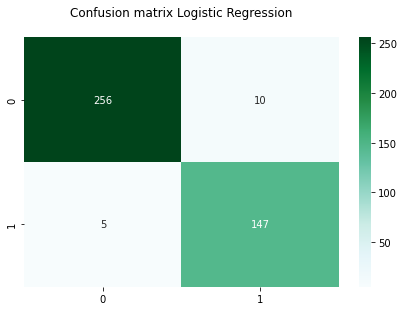

In [32]:
#Plotting Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_LR = confusion_matrix(y_test,y_pred_lr)
sn.heatmap(confusion_matrix_LR, annot=True,cmap="BuGn" , fmt='g')
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n')

We can check also the performance of the model by considering different metrics. 

In [ ]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       266
           1       0.94      0.97      0.95       152

    accuracy                           0.96       418
   macro avg       0.96      0.96      0.96       418
weighted avg       0.96      0.96      0.96       418



## Degree 2 Logistic Regression

Here we will use a Logistic Regression model of degree two to check the results. 

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

pipeline = Pipeline(steps=[
                           ('outlier', FunctionTransformer(outlier_winsorization)) ,
                           ('scaler',MaxAbsScaler()), 
                           ('poly' , poly),
                           ('model', LogisticRegression())
                           ])

Fitting the model with the training dataset. 

In [ ]:
pipeline.fit(X_train, y_train) 

Pipeline(steps=[('outlier',
                 FunctionTransformer(func=<function outlier_winsorization at 0x7fbccce58c20>)),
                ('scaler', MaxAbsScaler()), ('poly', PolynomialFeatures()),
                ('model', LogisticRegression())])

Predicting the values. 

In [ ]:
y_pred_lr_degree2 = pipeline.predict(X_test)

Checking the preformance of our model in different metrics. 

In [ ]:
print(classification_report(y_test, y_pred_lr_degree2))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       266
           1       0.97      0.77      0.86       152

    accuracy                           0.91       418
   macro avg       0.92      0.88      0.89       418
weighted avg       0.91      0.91      0.90       418



* **Note:** As you can see the performance of the model has been decreased. This is a practical example of **Overfitting**. We are using a 2 degree Logistic Regression and obviously this model can explain the training set by when it comes to predicting the unseen data it works worse comparing to the linear version. 

## Hyperparameter Tuning

In hyperparameter tuning we are trying the find the best possible model to describe our data. Then by using this best model we will try to predict our unseen data. 

To avoid getting any possible warnings. 

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

We will use Logistic Regression as our model. You can check on the documentation of Sklearn that this model can have different parameters to set. Here we are choosing a subset of these parameters and we are trying to build the model with different values of these parameters to find the best possibl combination of these parameters. 

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
'''
summarized from this link and sckit-learn official website.
https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-definitions

fit_intercept: Intercept (a.k.a. bias) added to the decision function.
max_iter: Maximum number of iterations taken for the solvers to converge.

'''

params = {
   'model__penalty': ['none', 'l1', 'l2', 'elasticnet'],
   'model__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
   'model__max_iter': [5, 10, 15, 20, 30],
  }

hp_tuning = GridSearchCV(pipeline, params, scoring='accuracy', cv=5)
hp_tuning.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % hp_tuning.best_score_)
print(hp_tuning.best_params_)

Best parameter (CV score=0.799):
{'model__max_iter': 10, 'model__penalty': 'none', 'model__solver': 'sag'}


The we will use this best model to check it's performance on the test set. 

In [ ]:
y_pred = hp_tuning.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94       266
           1       0.85      0.99      0.91       152

    accuracy                           0.93       418
   macro avg       0.92      0.94      0.93       418
weighted avg       0.94      0.93      0.93       418



# RandomizedSearch

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
LogisticRegression_random_search=RandomizedSearchCV(estimator = pipeline,
                                 param_distributions = params, 
                                 n_iter=200)
LogisticRegression_random_search.fit(X_train, y_train)
LogisticRegression_random_search.score(X_test, y_test)

## K_fold Cross validation

Now in this section we are tyring to check the generalization of our best model. 

To do so, we will put together both the training set and test set and check the performance of our model by considering 5 fold. 

In [ ]:
X_train, y_train = Split_dataframe(Train_df[All_final_features + ['Survived']], 'Survived')
X_test, y_test = pd.read_csv('test.csv')[All_final_features], pd.read_csv('gender_submission')['Survived']

In [ ]:
X, y = pd.concat([X_train, X_test]).reset_index(drop = True), pd.concat([y_train, y_test]).reset_index(drop = True)

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import cross_val_score

# First we should fill the missing values of the training set 
X = Fill_missed_values(X)

# We pick our encoder to be one-hot encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#Then we will first encode out categorical features and we want the same encoder to be used when we want to encode our test set 
_, X = encoding(encoder, X, All_final_cat_cols)

model = hp_tuning.best_estimator_['model']

pipeline = Pipeline(steps=[
                           ('outlier', FunctionTransformer(outlier_winsorization)) ,
                           ('scaler',MaxAbsScaler()), 
                           ('model', model)
                           ])
print('Accuracy on each fold: ')
Res = cross_val_score(pipeline, X, y, cv=5)
Res

Accuracy on each fold: 


array([0.79770992, 0.79770992, 0.76717557, 0.90458015, 0.99233716])

The average accuracy of the LogisticRegression model on this data set has been computed here. 

In [ ]:
Res.sum()/Res.shape[0]

0.8519025474540085

1- Changing the encoder 
2- Function for dropping the columns of the feature selection 